In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
# 加载数据
digits = load_digits()

# 将64维数据投影到较低维
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

In [14]:
digits['images'].shape

(1797, 8, 8)

In [3]:
# 使用网格搜索交叉验证来优化带宽
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 3.79269019073225


In [4]:
# 使用最佳估计器来计算核密度估计
kde = grid.best_estimator_

In [11]:
# 从数据中抽样44个点
new_data_i = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data_i)

# 把数据变换为4*11结构的网格
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

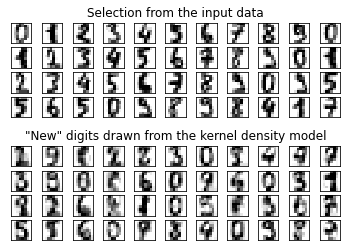

In [12]:
# 绘制真实的手写数字数据集以及抽样出的44个数字的数据集
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()